In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import time
import sys
sys.path.insert(0,'../..')
from gp2 import Runner

In [4]:

R = Runner(verbose=True)

*** GP2 ***
Working directory: /tmp/tmpgwoexiikGP2
Verbose mode active!


In [5]:
# load our larger toy dataset (10k images and masks)
images = np.load('/hpcstor6/scratch01/p/poornendu.pabbati001/crack_segmentation_dataset/Crack_images_final.npy')
masks = np.load('/hpcstor6/scratch01/p/poornendu.pabbati001/crack_segmentation_dataset/Crack_masks_final.npy')

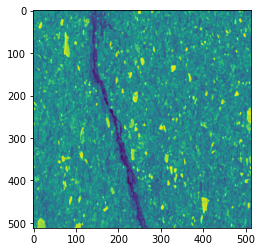

In [6]:
plt.imshow(images[500])

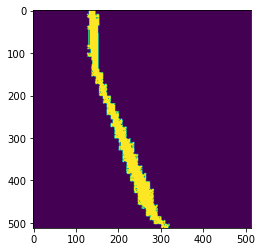

In [7]:
plt.imshow(masks[500])

In [8]:
len(images)

11298

In [9]:
weights = {
    'A': 0.5,
    'A_train': 0.1,
    'A_val': 0.3,
    'A_test': 0.6,
    'B': 0.3,
    'B_train': 0.7,
    'B_val': 0.1,
    'B_test': 0.2,
    'Z': 0.2
}

In [10]:
#
#
R.setup_data(images, masks, dataset_size=11298, weights=weights)

Weights OK!


In [11]:
RUNS = 5

In [ ]:
for run in range(RUNS):
    print('***')
    print('RUN:', run)
    t0 = time.time()
    R.run_classifier()
    R.run_discriminator()
    R.find_machine_labels()
    R.relabel()
    print('TOOK', time.time()-t0, 'seconds')
    

***
RUN: 0
Epoch 1/100
5/5 [==============================] - ETA: 0s - loss: 1.4610 - dice_coeff: 0.1039  

5/5 [==============================] - 2171s 473s/step - loss: 1.4610 - dice_coeff: 0.1039 - val_loss: 1.5672 - val_dice_coeff: 0.1183
Epoch 2/100
5/5 [==============================] - ETA: 0s - loss: 1.3946 - dice_coeff: 0.1252  

5/5 [==============================] - 2095s 456s/step - loss: 1.3946 - dice_coeff: 0.1252 - val_loss: 1.5574 - val_dice_coeff: 0.1181
Epoch 3/100
5/5 [==============================] - ETA: 0s - loss: 1.3362 - dice_coeff: 0.1435  

In [13]:
R.classifier_scores

[[1.3255164623260498, 0.2919084429740906],
 [1.2821929454803467, 0.30570515990257263],
 [1.252982258796692, 0.30330851674079895]]

In [14]:
R.discriminator_scores

[[0.0, 1.0], [0.0, 1.0], [0.0, 1.0]]

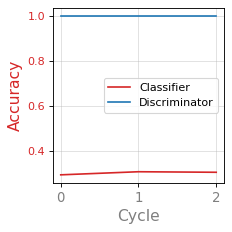

In [15]:
R.plot()